In [30]:
library(ggplot2)
library(data.table)
theme_set(theme_bw())
library(patchwork)
# library(ggpubr)

In [31]:
# setwd('~/m/msingle/mess/124_singlem-benchmarking')

In [32]:
# from plot.ipynb in folder 2
novelty_benchmark_results = fread('2_phylogenetic_novelty/bray_curtis.tsv')
table(novelty_benchmark_results$tool)


    kaiju    kraken     map2b  metabuli metaphlan     motus   singlem  sourmash 
      840       840       840       840       840       840       840       840 

In [33]:
tools = c('singlem', 'metaphlan', 'motus', 'kraken', 'sourmash', 'kaiju', 'map2b', 'metabuli')
# Tools that do not have the correct taxonomy are tested only at the domain level. eg. Kaiju has NCBI taxonomy and MAP2B uses GTDB v202, mOTUs sometimes has incompatible strings
correct_taxonomy_tools = c('singlem', 'metaphlan', 'kraken', 'sourmash', 'metabuli')

publication_names = data.table(
    tool = tools,
    publication_name = c('SingleM', 'MetaPhlAn', 'mOTUs', 'Kraken2', 'sourmash', 'Kaiju', 'MAP2B', 'Metabuli')
)

tools2_order = publication_names$publication_name
name_to_publication_name = function(names, correct_taxonomy_only=F){
    to_return = c()
    for (name in names){
        to_return = c(to_return, publication_names[tool==name]$publication_name)
    }
    if (correct_taxonomy_only){
        return(factor(to_return, levels=publication_names[tool %in% correct_taxonomy_tools]$publication_name))
    } else {
        return(factor(to_return, levels=publication_names$publication_name))
    }
}

correct_taxonomy_tools_publication_names = name_to_publication_name(correct_taxonomy_tools)

In [34]:
orders = c('kingdom','phylum','class','order','family','genus','species')
novelty_benchmark_results[, rank := factor(rank, levels=orders)]
novelty_benchmark_results[, novelty_category := factor(novelty_category, levels=orders)]

novelty_benchmark_results[, tool := factor(tool, levels=tools)]
novel_orders = gsub('^','novel ',orders)
novelty_benchmark_results[, novelty_category_novel := factor(novelty_category_novel, levels=novel_orders)]

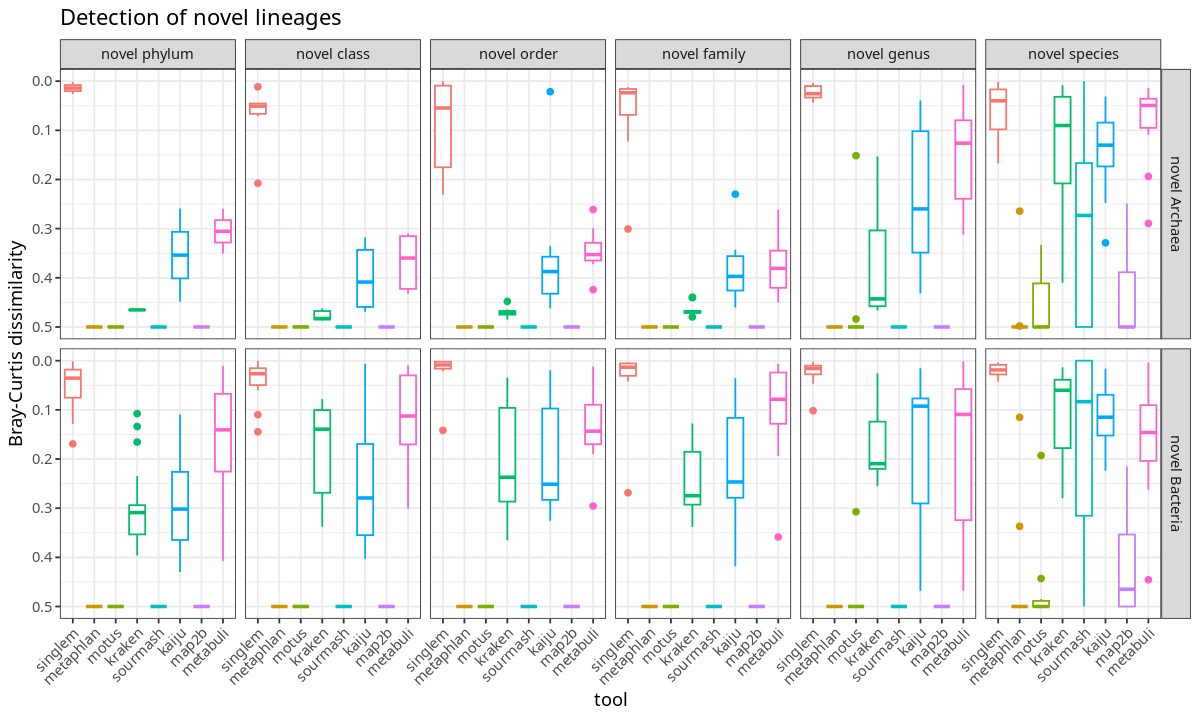

In [35]:
qplot(data=novelty_benchmark_results[rank=='kingdom'], tool, value, geom='boxplot', main='Detection of novel lineages', colour=tool, ylab='Bray-Curtis dissimilarity')+facet_grid(kingdom~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse()

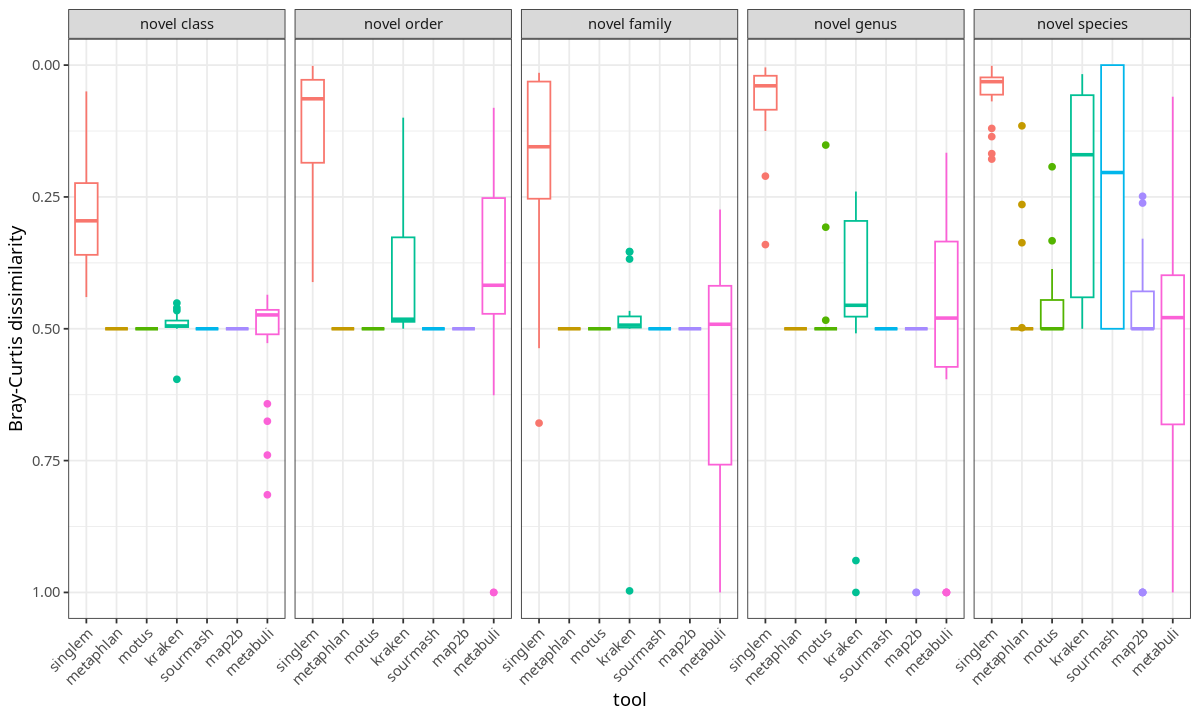

In [36]:
# What about when the rank equals one level above the novelty category?

# novelty_benchmark_results
# novelty_benchmark_results[tool != 'kaiju'][novelty_category != 'phylum'][rank==orders[as.numeric(novelty_category)-1]]
qplot(data=novelty_benchmark_results[tool != 'kaiju'][novelty_category != 'phylum'][rank==orders[as.numeric(novelty_category)-1]], colour=tool, ylab='Bray-Curtis dissimilarity', tool, value, geom='boxplot')+facet_grid(.~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse()

In [37]:
# Read non-novelty results
marine = fread('1_novel_strains/accuracy_results.csv')
marine[0:3]

tool,community,rank,metric,value
<chr>,<chr>,<chr>,<chr>,<dbl>
singlem,marine0,kingdom,Bray-Curtis distance,0.001959197
singlem,marine0,phylum,Bray-Curtis distance,0.016112387
singlem,marine0,class,Bray-Curtis distance,0.016821463


In [38]:
# Average F1 at the species level for each tool
marine[rank=='species' & metric %in% c('F1 score','Completeness'), mean(value), by=list(tool,metric)]

tool,metric,V1
<chr>,<chr>,<dbl>
singlem,Completeness,0.86667615
singlem,F1 score,0.90286533
metaphlan,Completeness,0.78950189
metaphlan,F1 score,0.84216413
kraken,Completeness,0.98763113
kraken,F1 score,0.24272438
sourmash,Completeness,0.58786896
sourmash,F1 score,0.72993115
metabuli,Completeness,0.44440479


In [39]:
runtimes = fread('1_novel_strains/runtime.csv')
runtimes[0:3]

tool,threads,community,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time
<chr>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
singlem,1,marine0,2095.2530,0:34:55,2118.18,4199.02,2099.82,2101.65,5165.68,577.93,89.76,1906.17
metaphlan,1,marine0,22857.8442,6:20:57,17510.76,18019.95,17469.80,17484.95,7914.11,116.59,99.50,22742.44
kraken,1,marine0,991.0659,0:16:31,294865.69,294878.02,294860.20,294860.44,23511.73,0.01,92.02,912.79


In [40]:
novelty_benchmark_results[, tool2 := name_to_publication_name(tool)]
marine[, tool2 := tool]
runtimes[, tool2 := name_to_publication_name(tool)]

my_colours = c(
#1b9e77 Dark2
#d95f02
#7570b3
#e7298a
#66a61e
#e6ab02
#a6761d
#666666
'#e7298a',
'#1b9e77',
'#d95f02',
'#7570b3',
'#66a61e',
'#e6ab02',
'#a6761d',
'#666666'

#     '#e7298a','#1b9e77', #?
# '#d95f02',
# '#7570b3',

# '#66a61e',
# '#e6ab02'
)
options(repr.plot.width=7, repr.plot.height=10)

# library(ggbreak)
runtimes2 = runtimes[threads==1, .(mins=mean(s/60), max_rss=mean(max_rss/1000)), by=.(tool2)]

In [41]:
# ggbreak doesn't get applied so can't use ggarrange


# rp = qplot(data=runtimes2, xlab='', tool2, mins, geom='col', fill=tool2, ylab='Runtime (mins)') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_fill_manual(breaks=tools2_order, values=my_colours)+scale_y_break(c(750,6200))

# library(patchwork)

# ggarrange(
#     qplot(data=novelty_benchmark_results[rank=='kingdom'], xlab='', tool2, value, geom='boxplot', colour=tool2, ylab='Bray-Curtis dissimilarity')+facet_grid(kingdom~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none') +scale_color_manual(breaks=tools2_order, values=my_colours)+scale_y_reverse(),

#     qplot(data=novelty_benchmark_results[tool != 'kaiju'][rank==orders[as.numeric(novelty_category)-1]], colour=tool2, ylab='Dissimilarity', tool2, value, xlab='', geom='boxplot')+facet_grid(.~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse() +scale_color_manual(breaks=tools2_order, values=my_colours),

#     ggarrange(
#         qplot(data=marine[rank=='species'], xlab='', ylim=c(0.6,0), tool2, value, geom='boxplot', colour=tool2, ylab='Dissimilarity') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_color_manual(breaks=tools2_order, values=my_colours),

#         rp,

#         qplot(data=runtimes[threads==1], xlab='', tool2, max_rss/1000, geom='boxplot', colour=tool2, ylab='Memory (GB)') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_color_manual(breaks=tools2_order, values=my_colours),

#         labels=c('C','D','E'),
#         nrow=1
#     ),

#     nrow=3,
#     labels=c('A','B'),
#     heights=c(2,1.2,1.2)
# )

In [42]:
runtimes[, mean(s/60), by=tool2]

tool2,V1
<fct>,<dbl>
SingleM,34.01210
MetaPhlAn,368.65571
Kraken2,17.35564
sourmash,48.81879
Metabuli,291.03687


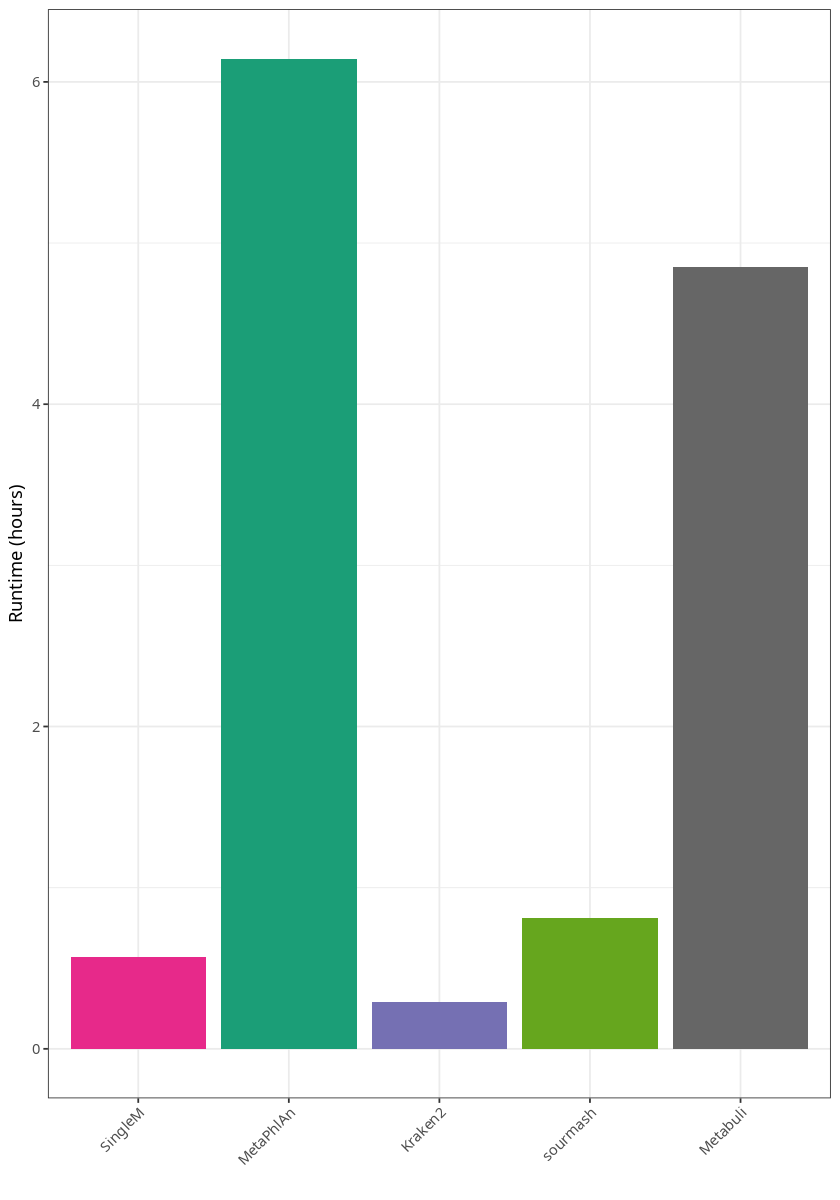

In [43]:
qplot(data=runtimes2[tool2 %in% correct_taxonomy_tools_publication_names], xlab='', tool2, mins/60, geom='col', fill=tool2, ylab='Runtime (hours)') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_fill_manual(breaks=tools2_order, values=my_colours)#+scale_y_break(c(750,6200))

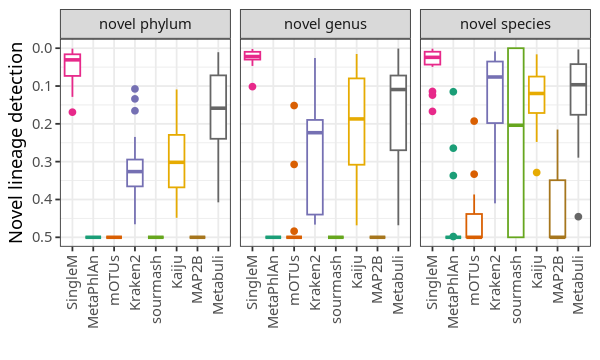

In [44]:
options(repr.plot.width=5, repr.plot.height=3)
qplot(data=novelty_benchmark_results[rank=='kingdom' & novelty_category_novel %in% c('novel phylum','novel genus','novel species')], xlab='', tool2, value, geom='boxplot', colour=tool2, ylab='Novel lineage detection')+facet_grid(.~novelty_category_novel)+theme(legend.position='none') +scale_color_manual(breaks=tools2_order, values=my_colours)+scale_y_reverse() +theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust=0.5))
# ggsave('novel_lineage_detection.svg', width=5, height=3)

# Read CAMI benchmark

In [45]:
cami_results = fread('3_cami2_marine/accuracy_results.csv',sep='\t')
cami_results[0:3]

tool,community,rank,metric,value
<chr>,<chr>,<chr>,<chr>,<dbl>
singlem,marine0,kingdom,Bray-Curtis distance,0.001003460
singlem,marine0,phylum,Bray-Curtis distance,0.007422594
singlem,marine0,class,Bray-Curtis distance,0.009349926


In [46]:
cami_results[, tool2 := name_to_publication_name(tool)]
cami_results[, rank := factor(rank, levels=orders)]

In [47]:
cami_results[rank=='species' & metric %in% c('F1 score','Completeness','Bray-Curtis distance'), mean(value), by=list(tool,metric)]

tool,metric,V1
<chr>,<chr>,<dbl>
singlem,Bray-Curtis distance,0.16755522
singlem,Completeness,0.57128045
singlem,F1 score,0.71576100
metaphlan,Bray-Curtis distance,0.08452814
metaphlan,Completeness,0.90780693
metaphlan,F1 score,0.92575106
kraken,Bray-Curtis distance,0.20172044
kraken,Completeness,0.99391726
kraken,F1 score,0.33698593


# Read bench 4 results

In [48]:
bench4 = fread('4_complex_and_novel/accuracy_results.csv',sep=',')
bench4[, tool2 := name_to_publication_name(tool)]
bench4[0:3]

tool,sample,known,rank,metric,value,tool2
<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<fct>
singlem,marine0,0,kingdom,Bray-Curtis distance,0.00300689,SingleM
singlem,marine0,0,phylum,Bray-Curtis distance,0.01800624,SingleM
singlem,marine0,0,class,Bray-Curtis distance,0.02793610,SingleM


In [49]:
bench4[, median := median(value), by=.(tool2,rank,metric,known)]

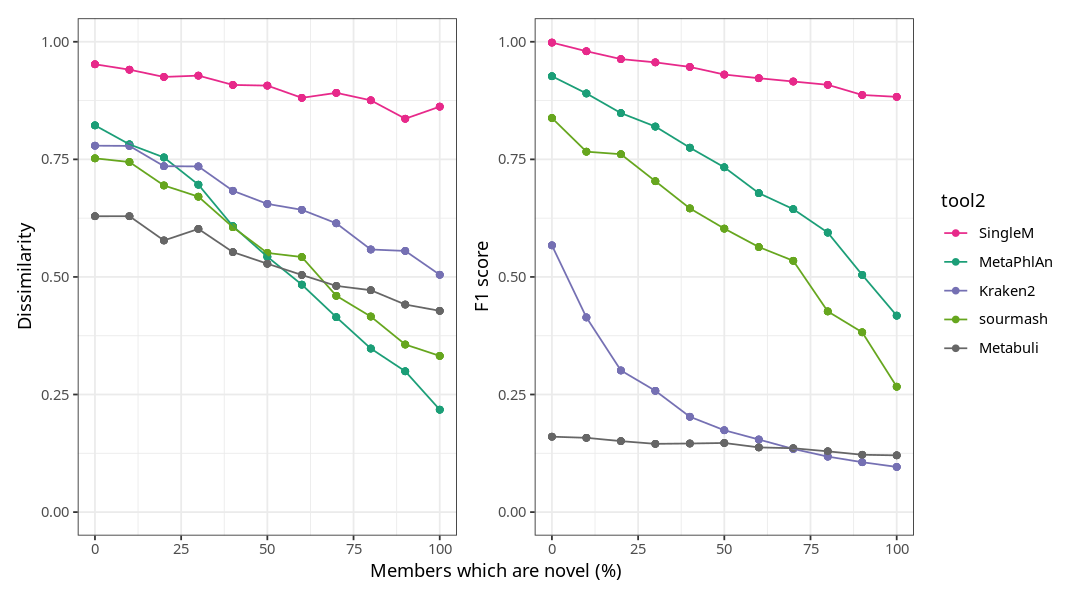

In [58]:
# no legend
bench4_bc = qplot(data=bench4[metric=='Bray-Curtis distance'][rank=='genus' & tool %in% correct_taxonomy_tools], known, 1-median, colour=tool2)+geom_line()+ylab('Dissimilarity')+xlab('Members which are novel (%)')+ylim(0,1)+scale_colour_manual(breaks=tools2_order, values=my_colours)+theme(legend.position='none')

bench4_f1 = qplot(data=bench4[metric=='F1 score'][rank=='genus' & tool %in% correct_taxonomy_tools], known, median, colour=tool2)+geom_line()+ylab('F1 score')+xlab('Members which are novel (%)')+ylim(0,1)+theme(legend.position='none')+scale_colour_manual(breaks=tools2_order, values=my_colours)+theme(legend.position='none')

options(repr.plot.width=9, repr.plot.height=5)
bench4_bc + bench4_f1 +theme(legend.position='right') +
  plot_layout(axis_titles = "collect")

ggsave('bench4.svg', width=9, height=5)

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


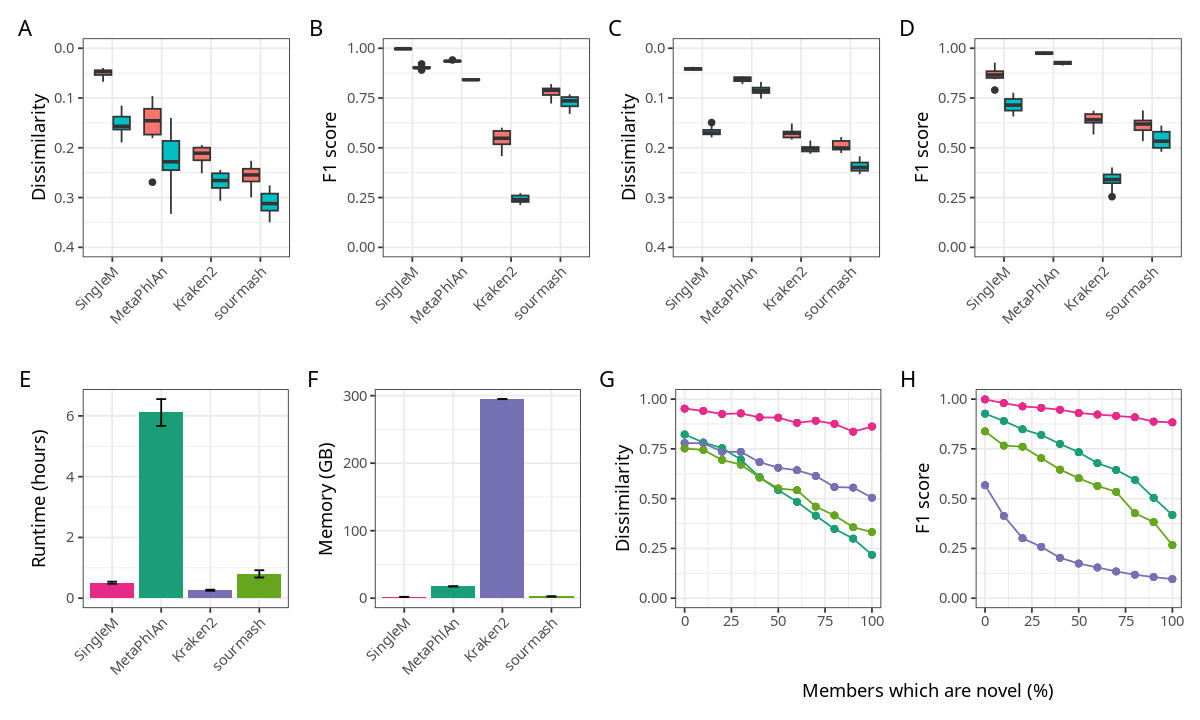

In [54]:
# f1/bray x rank x tool x community
marine[, tool2 := name_to_publication_name(tool)]
marine_no_metabuli = marine[tool != 'metabuli']

runtimes2 = runtimes[,.(mins=mean(cpu_time/60), max_rss=mean(max_rss/1000), min_sd=sd(cpu_time/60), max_rss_sd=sd(max_rss/1000)), by=tool2]

bc_max = 0.4
f1_min = 0


plot31 = qplot(data=marine_no_metabuli[rank %in% c('species','genus') & metric=='Bray-Curtis distance'], xlab='', ylim=c(0.4,0), tool2, value, geom='boxplot', fill=rank, ylab='Dissimilarity') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_color_manual(breaks=tools2_order, values=my_colours)

novel_strains_f1 = qplot(data=marine_no_metabuli[rank %in% c('species','genus') & metric=='F1 score'], xlab='', tool2, value, geom='boxplot', fill=rank, ylab='F1 score') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_color_manual(breaks=tools2_order, values=my_colours)


plot32 = qplot(data=runtimes2[tool2 != 'Metabuli'][tool2 %in% correct_taxonomy_tools_publication_names], xlab='', tool2, mins/60, geom='col', fill=tool2, ylab='Runtime (hours)') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_fill_manual(breaks=tools2_order, values=my_colours)+geom_errorbar(aes(ymin=mins/60-min_sd/60, ymax=mins/60+min_sd/60), width=0.2)

plot33 = qplot(data=runtimes2[tool2 != 'Metabuli'][tool2 %in% correct_taxonomy_tools_publication_names], xlab='', tool2, max_rss, geom='col', fill=tool2, ylab='Memory (GB)') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_fill_manual(breaks=tools2_order, values=my_colours)+geom_errorbar(aes(ymin=max_rss-max_rss_sd, ymax=max_rss+max_rss_sd), width=0.2)


# [tool != 'metabuli']
cami_bc = qplot(data=cami_results[tool != 'metabuli'][rank %in% c('species','genus') & metric=='Bray-Curtis distance'], x=tool2, y=value, fill=rank, geom='boxplot', ylim=c(0.33,0)) +theme(legend.position='none')+ylab('Dissimilarity')+xlab('') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')

cami_f1 = qplot(data=cami_results[tool != 'metabuli'][rank %in% c('species','genus') & metric=='F1 score'], x=tool2, y=value, fill=rank, geom='boxplot')+ylab('F1 score')+xlab('') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')


# Remove metabuli
bench4_bc = qplot(data=bench4[tool != 'metabuli'][metric=='Bray-Curtis distance'][rank=='genus' & tool %in% correct_taxonomy_tools], known, 1-median, colour=tool2)+geom_line()+ylab('Dissimilarity')+xlab('Members which are novel (%)')+ylim(0,1)+scale_colour_manual(breaks=tools2_order, values=my_colours)+theme(legend.position='none')

bench4_f1 = qplot(data=bench4[tool != 'metabuli'][metric=='F1 score'][rank=='genus' & tool %in% correct_taxonomy_tools], known, median, colour=tool2)+geom_line()+ylab('F1 score')+xlab('Members which are novel (%)')+ylim(0,1)+theme(legend.position='none')+scale_colour_manual(breaks=tools2_order, values=my_colours)+theme(legend.position='none')


options(repr.plot.width=10, repr.plot.height=6)
((plot31+ylim(bc_max,0)) + (novel_strains_f1+ylim(f1_min,1)) + (cami_bc+ylim(bc_max,0)) + (cami_f1+ylim(f1_min,1)) + plot_layout(nrow=1)) / 
    (plot32 + plot33 + bench4_bc + bench4_f1 + plot_layout(nrow=1, axis_titles = "collect")) + plot_annotation(tag_levels = list(c('A','B','C','D','E','F','G','H')))

ggsave('fig2new.svg', width=10, height=6)


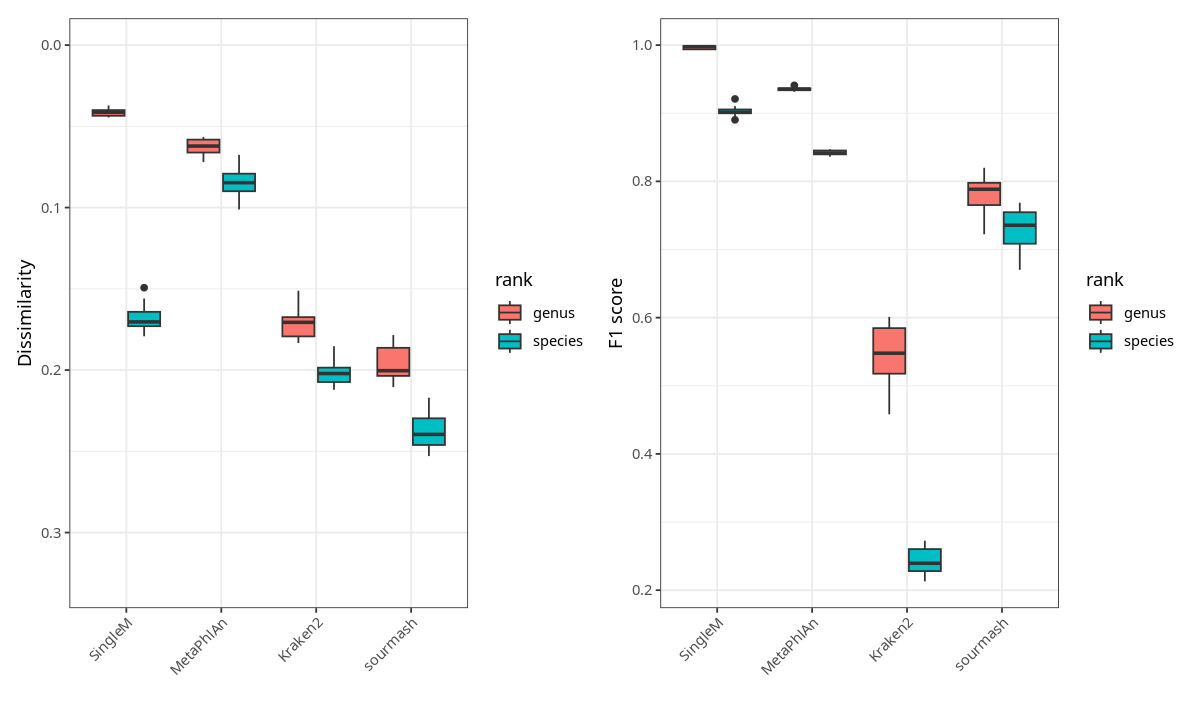

In [52]:
# And another to get the legend
cami_bc_legend = cami_bc+theme(legend.position='right')

novel_strains_f1_legend = novel_strains_f1+theme(legend.position='right')

cami_bc_legend + novel_strains_f1_legend
ggsave('fig2new_legend.svg', width=10, height=6)


  SingleM MetaPhlAn     mOTUs   Kraken2  sourmash     Kaiju     MAP2B  Metabuli 
        0         0         0         3         0         0         0        20 


  SingleM MetaPhlAn     mOTUs   Kraken2  sourmash     Kaiju     MAP2B  Metabuli 
        0         0         0         0         0         0         0         0 

Warning message:
“Removed 23 rows containing non-finite values (`stat_boxplot()`).”


Warning message:
“Removed 23 rows containing non-finite values (`stat_boxplot()`).”


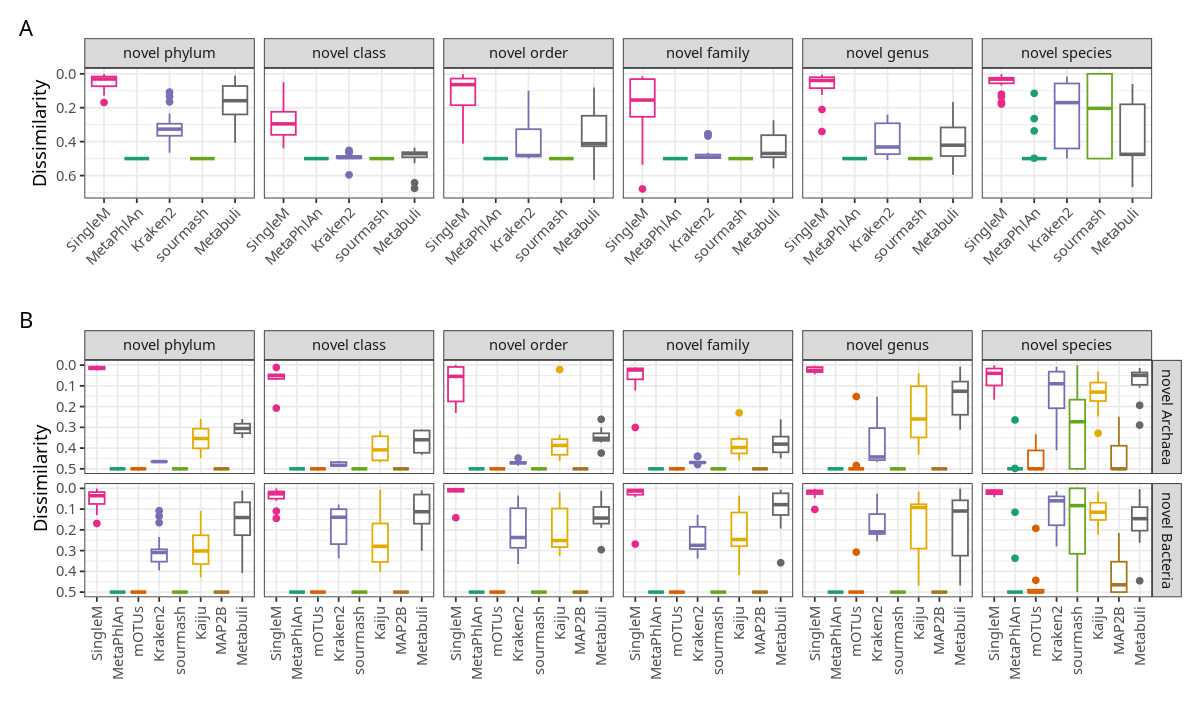

In [53]:
plot1 = qplot(data=novelty_benchmark_results[rank=='kingdom'], xlab='', tool2, value, geom='boxplot', colour=tool2, ylab='Dissimilarity')+facet_grid(kingdom~novelty_category_novel)+theme(legend.position='none') +scale_color_manual(breaks=tools2_order, values=my_colours) +theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust=0.5))+scale_y_reverse()

plot2_max_bc = 0.7

plot2 = qplot(data=novelty_benchmark_results[tool %in% correct_taxonomy_tools][rank==orders[as.numeric(novelty_category)-1]], colour=tool2, ylab='Dissimilarity', tool2, value, xlab='', geom='boxplot')+facet_grid(.~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none') +scale_color_manual(breaks=tools2_order, values=my_colours)+ylim(plot2_max_bc,0)

# Which tools have number < the min? ?
table(novelty_benchmark_results[tool %in% correct_taxonomy_tools][rank==orders[as.numeric(novelty_category)-1]][value > plot2_max_bc]$tool2)
table(novelty_benchmark_results[rank=='kingdom'][value > 0.5]$tool2)

plot2 / plot1 + 
  plot_annotation(tag_levels = list(c('A','B')))+
  plot_layout(heights = c(1.1,2))# & theme(plot.tag=element_text(vjust=-1.5))
ggsave('fig3new.svg', width=7, height=6)